In [1]:
import numpy as np
import math
import prune
import os
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
os.environ["OMP_NUM_THREADS"] = "1"

mp = prune.ModelPruner('MNIST', 'by_channel')
print(mp.baseline)





Load model: ./model_weights/vgg11_MNIST.pt...
validating...


100%|██████████| 10/10 [28:23<00:00, 170.30s/it]

{'loss': 0.1067563246935606, 'acc': 98.125}


In [12]:
#this is the phony generator
def generator(in_arr):
    pruned_model = mp.prune_model(in_arr)
    return mp.get_fitness_score(pruned_model)

def One_fifth_single_pass(decision_len, deci_arr_in, stepsize_in):
    random_normal_i = np.random.normal(0, 1, size=(decision_len))
    # random_normal = np.random.normal(0, 1, size=(1))
    
    #store input variable
    deci_arr = np.copy(deci_arr_in)
    stepsize = np.copy(stepsize_in)
    
    for i in range(decision_len):

        deci_arr[i] += stepsize*random_normal_i[i]
        if(deci_arr[i] <= 0.001):
            deci_arr[i] = 0.001
        elif(deci_arr[i] >= 1):
            deci_arr[i] = 0.999

    return deci_arr


def ESXPlusX_OneFifth(  Decision_var_record, Stepsize_record, Best_score_record, PS_record,
                        Decision_arr_init, Stepsize_init, Ggenerations, hp_a_param,
                        Target_run):
    train_runs = 0
    
    decision_var_arr = np.copy(Decision_arr_init)
    stepsize = Stepsize_init
    
    best_score = generator(decision_var_arr)

    while(train_runs < Target_run):
        print(f'Training epoch: {train_runs+1}/{Target_run}')
        # memorize_parent_decision_var_arr = np.copy(decision_var_arr)
        # memorize_parent_stepsize = stepsize

        evolve_kids = 0
        for run in range(Ggenerations):

            tmp_decision_var_arr = One_fifth_single_pass(len(Decision_arr_init),decision_var_arr,stepsize)
            tmp_score = generator(tmp_decision_var_arr)


            if(tmp_score < best_score):
                evolve_kids+=1
                best_score = tmp_score
                decision_var_arr = np.copy(tmp_decision_var_arr)
                
        if(evolve_kids > (Ggenerations/5)):
            stepsize = stepsize/hp_a_param
        elif(evolve_kids < (Ggenerations/5)):
            stepsize = stepsize*hp_a_param
        
        Decision_var_record.append(decision_var_arr)
        Stepsize_record.append(float(stepsize))
        Best_score_record.append(best_score)
        PS_record.append(evolve_kids/Ggenerations)
        train_runs+=1

    return decision_var_arr, stepsize, best_score


In [15]:
# Hyperparameters could be change here:

# Self adaptation of step-size: 1/5 Rule
# It runs for a certain amount of runs with fix stepsize, and determine if the 1/5 
# results are better than the parent generation.
# if yes, stepsize /= a
# else stepsize *= a


HP_DECISION_INITVAL = 0.5   # Initial value for decision variable
HP_STEPSIZE_INITVAL = 0.1   # Initial value for stepsize
HP_GGENERATIONS = 10         # Run how many runs before updating the step size
HP_A = 0.817                # a magical value to update step size, repordely 0.817 <= a <= 1
HP_ITERATIONS = 15           # Run how many runs, the total pruning is HP_GGENERATIONS*HP_ITERATIONS


#auto generated param(Don't change)
Decision_arr = np.array([HP_DECISION_INITVAL for i in range(mp.prunable_layer_num)]) 
DV_record = []
SZ_record = []
BS_reocrd = []
PS_record = []

ans_decvar, ans_stepsize, ans_bestscore = ESXPlusX_OneFifth(Decision_var_record=DV_record,Stepsize_record=SZ_record,Best_score_record=BS_reocrd, PS_record=PS_record,
            Decision_arr_init=Decision_arr,Stepsize_init=HP_STEPSIZE_INITVAL,
            Ggenerations=HP_GGENERATIONS, hp_a_param=HP_A, Target_run=HP_ITERATIONS)


print(DV_record)
print(SZ_record)
print(BS_reocrd)
print(PS_record)

pruning...
validating...



 50%|█████     | 5/10 [11:21<11:21, 136.33s/it]










100%|██████████| 10/10 [02:30<00:00, 15.06s/it]


acc: 96.5625
loss: 0.13004571050405503
sparsity: 0.250104151700836
Training epoch: 1/15
pruning...
validating...



 50%|█████     | 5/10 [13:56<13:56, 167.26s/it]










100%|██████████| 10/10 [02:20<00:00, 14.06s/it]


acc: 96.25
loss: 0.14667113199830056
sparsity: 0.2193572234171251


 50%|█████     | 5/10 [16:19<16:19, 195.89s/it]


pruning...
validating...


100%|██████████| 10/10 [02:10<00:00, 13.01s/it]


acc: 97.03125
loss: 0.12205344326794147
sparsity: 0.11983924265910817
pruning...
validating...


100%|██████████| 10/10 [02:22<00:00, 14.27s/it]


acc: 98.125
loss: 0.11293220520019531
sparsity: 0.11521427984838065
pruning...
validating...


100%|██████████| 10/10 [04:46<00:00, 28.62s/it]


acc: 97.03125
loss: 0.12397498227655887
sparsity: 0.08368359943806293
pruning...
validating...


100%|██████████| 10/10 [03:00<00:00, 18.05s/it]


acc: 97.8125
loss: 0.12274595499038696
sparsity: 0.05867985469706198
pruning...
validating...


100%|██████████| 10/10 [02:59<00:00, 17.91s/it]


acc: 97.03125
loss: 0.13867153972387314
sparsity: 0.07820090577781356
pruning...
validating...


100%|██████████| 10/10 [05:32<00:00, 33.29s/it]


acc: 96.40625
loss: 0.13929954916238785
sparsity: 0.06864514346725022
pruning...
validating...


100%|██████████| 10/10 [04:32<00:00, 27.21s/it]


acc: 96.5625
loss: 0.1390812188386917
sparsity: 0.08425548470053398
pruning...
validating...


100%|██████████| 10/10 [02:41<00:00, 16.13s/it]


acc: 97.1875
loss: 0.12107967957854271
sparsity: 0.056059017335553935
pruning...
validating...


100%|██████████| 10/10 [02:46<00:00, 16.70s/it]


acc: 95.46875
loss: 0.3375768929719925
sparsity: 0.03314838367941644
Training epoch: 2/15
pruning...
validating...


100%|██████████| 10/10 [04:55<00:00, 29.53s/it]


acc: 96.40625
loss: 0.1355728030204773
sparsity: 0.11477524419305843
pruning...
validating...


100%|██████████| 10/10 [02:40<00:00, 16.00s/it]


acc: 95.625
loss: 0.19669347405433654
sparsity: 0.03953281966785331
pruning...
validating...


100%|██████████| 10/10 [03:12<00:00, 19.23s/it]


acc: 95.46875
loss: 0.27966300696134566
sparsity: 0.043020735174757865
pruning...
validating...


100%|██████████| 10/10 [02:43<00:00, 16.38s/it]


acc: 96.5625
loss: 0.14651024602353574
sparsity: 0.07401960568913692
pruning...
validating...


100%|██████████| 10/10 [02:42<00:00, 16.24s/it]


acc: 13.90625
loss: 2.3302534341812136
sparsity: 0.040233533026457366
pruning...
validating...


100%|██████████| 10/10 [06:43<00:00, 40.36s/it]


acc: 8.28125
loss: 2.3030048608779907
sparsity: 0.08153252580253484
pruning...
validating...


100%|██████████| 10/10 [02:53<00:00, 17.37s/it]


acc: 23.28125
loss: 2.065510320663452
sparsity: 0.01847887417193556
pruning...
validating...


100%|██████████| 10/10 [04:54<00:00, 29.48s/it]


acc: 24.84375
loss: 2.071553349494934
sparsity: 0.02439683817313903
pruning...
validating...


100%|██████████| 10/10 [03:32<00:00, 21.24s/it]


acc: 24.53125
loss: 2.06861572265625
sparsity: 0.025081380088797137
pruning...
validating...


100%|██████████| 10/10 [03:37<00:00, 21.79s/it]


acc: 97.5
loss: 0.12105953060090542
sparsity: 0.14231775796941207
Training epoch: 3/15
pruning...
validating...


100%|██████████| 10/10 [03:08<00:00, 18.90s/it]


acc: 82.5
loss: 1.9025579333305358
sparsity: 0.04152197702201768
pruning...
validating...


100%|██████████| 10/10 [02:23<00:00, 14.34s/it]


acc: 97.1875
loss: 0.1304246485233307
sparsity: 0.08924984425961055
pruning...
validating...


100%|██████████| 10/10 [03:08<00:00, 18.83s/it]


acc: 96.5625
loss: 0.2343648597598076
sparsity: 0.04391483818472222
pruning...
validating...


100%|██████████| 10/10 [02:56<00:00, 17.67s/it]


acc: 97.34375
loss: 0.13190856501460074
sparsity: 0.11875265833135272
pruning...
validating...


100%|██████████| 10/10 [02:18<00:00, 13.84s/it]


acc: 23.90625
loss: 2.0660571217536927
sparsity: 0.02206417545911565
pruning...
validating...


100%|██████████| 10/10 [02:58<00:00, 17.86s/it]


acc: 97.1875
loss: 0.126968415081501
sparsity: 0.11239606237863557
pruning...
validating...


100%|██████████| 10/10 [02:36<00:00, 15.63s/it]


acc: 96.875
loss: 0.12868174016475678
sparsity: 0.045743833816383056
pruning...
validating...


100%|██████████| 10/10 [02:42<00:00, 16.23s/it]


acc: 23.90625
loss: 2.060953235626221
sparsity: 0.01816889951878972
pruning...
validating...


100%|██████████| 10/10 [02:33<00:00, 15.33s/it]


acc: 96.71875
loss: 0.14092597216367722
sparsity: 0.0806247744984279
pruning...
validating...


100%|██████████| 10/10 [02:44<00:00, 16.49s/it]


acc: 48.90625
loss: 1.67308167219162
sparsity: 0.025513987537321835
Training epoch: 4/15
pruning...
validating...


100%|██████████| 10/10 [02:48<00:00, 16.89s/it]


acc: 25.46875
loss: 2.07064528465271
sparsity: 0.017879288617370818
pruning...
validating...


100%|██████████| 10/10 [03:21<00:00, 20.14s/it]


acc: 96.40625
loss: 0.19925737380981445
sparsity: 0.031244050706254193
pruning...
validating...


100%|██████████| 10/10 [03:18<00:00, 19.80s/it]


acc: 47.34375
loss: 1.826983392238617
sparsity: 0.044206219172070876
pruning...
validating...


100%|██████████| 10/10 [02:57<00:00, 17.71s/it]


acc: 22.5
loss: 2.0981779217720034
sparsity: 0.016698175490138734
pruning...
validating...


100%|██████████| 10/10 [02:34<00:00, 15.41s/it]


acc: 96.40625
loss: 0.13358550816774367
sparsity: 0.0615476889175836
pruning...
validating...


100%|██████████| 10/10 [02:17<00:00, 13.77s/it]


acc: 90.9375
loss: 0.5440008878707886
sparsity: 0.025830328288986962
pruning...
validating...


100%|██████████| 10/10 [01:55<00:00, 11.59s/it]


acc: 97.96875
loss: 0.11339852139353752
sparsity: 0.04129293721894937
pruning...
validating...


100%|██████████| 10/10 [01:48<00:00, 10.84s/it]


acc: 97.1875
loss: 0.12669136449694635
sparsity: 0.061422851278327334
pruning...
validating...


100%|██████████| 10/10 [01:25<00:00,  8.54s/it]


acc: 56.25
loss: 1.3064960718154908
sparsity: 0.024905015869208538
pruning...
validating...


100%|██████████| 10/10 [02:22<00:00, 14.28s/it]


acc: 95.78125
loss: 0.16355568841099738
sparsity: 0.045164619777080035
Training epoch: 5/15
pruning...
validating...


100%|██████████| 10/10 [01:51<00:00, 11.18s/it]


acc: 94.21875
loss: 0.5190026551485062
sparsity: 0.03539845791045424
pruning...
validating...


100%|██████████| 10/10 [01:58<00:00, 11.81s/it]


acc: 9.6875
loss: 2.3118768453598024
sparsity: 0.06256141247143232
pruning...
validating...


100%|██████████| 10/10 [02:29<00:00, 14.94s/it]


acc: 58.12500000000001
loss: 1.3136069655418396
sparsity: 0.024381877841618705
pruning...
validating...


100%|██████████| 10/10 [02:11<00:00, 13.14s/it]


acc: 58.90625000000001
loss: 1.2791417360305786
sparsity: 0.029245631455097742
pruning...
validating...


100%|██████████| 10/10 [01:33<00:00,  9.39s/it]


acc: 44.375
loss: 2.1526058435440065
sparsity: 0.07221688185917031
pruning...
validating...


100%|██████████| 10/10 [01:42<00:00, 10.26s/it]


acc: 96.40625
loss: 0.4763460695743561
sparsity: 0.040934145459109283
pruning...
validating...


100%|██████████| 10/10 [02:02<00:00, 12.27s/it]


acc: 95.0
loss: 0.5231839686632156
sparsity: 0.04118774132268553
pruning...
validating...


100%|██████████| 10/10 [01:49<00:00, 10.97s/it]


acc: 94.84375
loss: 0.1763791933655739
sparsity: 0.04279130719495057
pruning...
validating...


100%|██████████| 10/10 [01:41<00:00, 10.14s/it]


acc: 96.09375
loss: 0.5183664917945862
sparsity: 0.02802819274863182
pruning...
validating...


100%|██████████| 10/10 [02:24<00:00, 14.45s/it]


acc: 96.09375
loss: 0.16358877643942832
sparsity: 0.04091003968361857
Training epoch: 6/15
pruning...
validating...


100%|██████████| 10/10 [01:45<00:00, 10.57s/it]


acc: 55.78125000000001
loss: 1.3487015604972838
sparsity: 0.027035127960831663
pruning...
validating...


100%|██████████| 10/10 [01:54<00:00, 11.47s/it]


acc: 96.25
loss: 0.14956373646855353
sparsity: 0.0435675286928212
pruning...
validating...


100%|██████████| 10/10 [02:15<00:00, 13.59s/it]


acc: 97.34375
loss: 0.1432832323014736
sparsity: 0.06152031469395067
pruning...
validating...


100%|██████████| 10/10 [02:06<00:00, 12.63s/it]


acc: 96.71875
loss: 0.14010875523090363
sparsity: 0.07582395209787246
pruning...
validating...


100%|██████████| 10/10 [01:40<00:00, 10.01s/it]


acc: 96.25
loss: 0.529116865992546
sparsity: 0.034280089671311034
pruning...
validating...


100%|██████████| 10/10 [02:01<00:00, 12.12s/it]


acc: 95.3125
loss: 0.17696399614214897
sparsity: 0.04066644325283847
pruning...
validating...


100%|██████████| 10/10 [01:33<00:00,  9.35s/it]


acc: 97.5
loss: 0.11870617717504502
sparsity: 0.053331431370826125
pruning...
validating...


100%|██████████| 10/10 [02:02<00:00, 12.20s/it]


acc: 97.03125
loss: 0.12355944514274597
sparsity: 0.060046198000600993
pruning...
validating...


100%|██████████| 10/10 [01:48<00:00, 10.82s/it]


acc: 42.1875
loss: 2.1578423023223876
sparsity: 0.0578563066911748
pruning...
validating...


100%|██████████| 10/10 [01:50<00:00, 11.06s/it]


acc: 97.1875
loss: 0.133197433128953
sparsity: 0.040170221400329574
Training epoch: 7/15
pruning...
validating...


100%|██████████| 10/10 [02:35<00:00, 15.51s/it]


acc: 9.375
loss: 2.305144119262695
sparsity: 0.050725655266790536
pruning...
validating...


100%|██████████| 10/10 [02:07<00:00, 12.72s/it]


acc: 96.875
loss: 0.46541047692298887
sparsity: 0.054776745350143416
pruning...
validating...


100%|██████████| 10/10 [01:54<00:00, 11.48s/it]


acc: 97.5
loss: 0.13901609405875207
sparsity: 0.039889538563907236
pruning...
validating...


100%|██████████| 10/10 [01:54<00:00, 11.48s/it]


acc: 96.71875
loss: 0.13567156344652176
sparsity: 0.047217065466767856
pruning...
validating...


100%|██████████| 10/10 [01:52<00:00, 11.20s/it]


acc: 97.1875
loss: 0.13890060782432556
sparsity: 0.02964931973656836
pruning...
validating...


100%|██████████| 10/10 [02:17<00:00, 13.77s/it]


acc: 96.25
loss: 0.15191337764263152
sparsity: 0.045035481139555855
pruning...
validating...


100%|██████████| 10/10 [02:23<00:00, 14.32s/it]


acc: 96.40625
loss: 0.13801976069808006
sparsity: 0.05115469925285139
pruning...
validating...


100%|██████████| 10/10 [01:54<00:00, 11.47s/it]


acc: 97.03125
loss: 0.1349647454917431
sparsity: 0.05629857672824863
pruning...
validating...


100%|██████████| 10/10 [02:06<00:00, 12.62s/it]


acc: 96.875
loss: 0.12248541936278343
sparsity: 0.03498688964118231
pruning...
validating...


100%|██████████| 10/10 [01:48<00:00, 10.81s/it]


acc: 95.78125
loss: 0.15952333807945251
sparsity: 0.044006214989078335
Training epoch: 8/15
pruning...
validating...


100%|██████████| 10/10 [02:26<00:00, 14.65s/it]


acc: 97.03125
loss: 0.14122529029846193
sparsity: 0.0457950886729981
pruning...
validating...


100%|██████████| 10/10 [01:52<00:00, 11.22s/it]


acc: 97.1875
loss: 0.13598771542310714
sparsity: 0.03856122881725358
pruning...
validating...


100%|██████████| 10/10 [01:36<00:00,  9.63s/it]


acc: 95.0
loss: 0.5192388117313385
sparsity: 0.050352392278121244
pruning...
validating...


100%|██████████| 10/10 [02:06<00:00, 12.68s/it]


acc: 96.875
loss: 0.1441256433725357
sparsity: 0.03811996502744961
pruning...
validating...


100%|██████████| 10/10 [01:53<00:00, 11.38s/it]


acc: 97.34375
loss: 0.13776271417737007
sparsity: 0.04981102547086887
pruning...
validating...


100%|██████████| 10/10 [01:52<00:00, 11.28s/it]


acc: 96.875
loss: 0.14401945173740388
sparsity: 0.05787826973106634
pruning...
validating...


100%|██████████| 10/10 [01:59<00:00, 11.94s/it]


acc: 96.40625
loss: 0.14750033915042876
sparsity: 0.03333590409848336
pruning...
validating...


100%|██████████| 10/10 [01:54<00:00, 11.43s/it]


acc: 95.78125
loss: 0.17252446860074996
sparsity: 0.045453493142694874
pruning...
validating...


100%|██████████| 10/10 [02:13<00:00, 13.34s/it]


acc: 95.625
loss: 0.14554860442876816
sparsity: 0.04112653361448302
pruning...
validating...


100%|██████████| 10/10 [02:04<00:00, 12.47s/it]


acc: 97.5
loss: 0.11282428689301013
sparsity: 0.041588122338340035
Training epoch: 9/15
pruning...
validating...


100%|██████████| 10/10 [02:02<00:00, 12.26s/it]


acc: 93.125
loss: 0.33437245339155197
sparsity: 0.03902460315410991
pruning...
validating...


100%|██████████| 10/10 [01:57<00:00, 11.73s/it]


acc: 57.8125
loss: 1.270615541934967
sparsity: 0.033097090005127505
pruning...
validating...


100%|██████████| 10/10 [01:59<00:00, 11.95s/it]


acc: 96.875
loss: 0.1475493136793375
sparsity: 0.04251168796279304
pruning...
validating...


100%|██████████| 10/10 [02:17<00:00, 13.75s/it]


acc: 57.65625
loss: 1.3161888480186463
sparsity: 0.04659269094565179
pruning...
validating...


100%|██████████| 10/10 [01:59<00:00, 11.93s/it]


acc: 97.5
loss: 0.12795196175575257
sparsity: 0.041106558039495054
pruning...
validating...


100%|██████████| 10/10 [01:49<00:00, 10.92s/it]


acc: 95.15625
loss: 0.17944704815745355
sparsity: 0.04185277347544246
pruning...
validating...


100%|██████████| 10/10 [01:53<00:00, 11.34s/it]


acc: 97.1875
loss: 0.1387293554842472
sparsity: 0.04245809628220933
pruning...
validating...


100%|██████████| 10/10 [01:57<00:00, 11.74s/it]


acc: 96.5625
loss: 0.15154840424656868
sparsity: 0.04923257225797425
pruning...
validating...


100%|██████████| 10/10 [02:15<00:00, 13.60s/it]


acc: 59.84374999999999
loss: 1.228877317905426
sparsity: 0.04726668998107918
pruning...
validating...


100%|██████████| 10/10 [02:02<00:00, 12.23s/it]


acc: 96.5625
loss: 0.13855825439095498
sparsity: 0.03835068175403032
Training epoch: 10/15
pruning...
validating...


100%|██████████| 10/10 [01:55<00:00, 11.51s/it]


acc: 61.40624999999999
loss: 1.2292934656143188
sparsity: 0.04019963743360955
pruning...
validating...


100%|██████████| 10/10 [02:26<00:00, 14.60s/it]


acc: 57.1875
loss: 1.280620539188385
sparsity: 0.039233030772338334
pruning...
validating...


100%|██████████| 10/10 [02:12<00:00, 13.25s/it]


acc: 96.5625
loss: 0.14473603367805482
sparsity: 0.042835155639385857
pruning...
validating...


100%|██████████| 10/10 [01:47<00:00, 10.75s/it]


acc: 95.0
loss: 0.22053345739841462
sparsity: 0.04092436340528696
pruning...
validating...


100%|██████████| 10/10 [01:57<00:00, 11.77s/it]


acc: 57.1875
loss: 1.3190287709236146
sparsity: 0.04084924344275937
pruning...
validating...


100%|██████████| 10/10 [02:12<00:00, 13.23s/it]


acc: 97.5
loss: 0.13274950459599494
sparsity: 0.0451287134287243
pruning...
validating...


100%|██████████| 10/10 [01:52<00:00, 11.26s/it]


acc: 93.4375
loss: 0.34258643090724944
sparsity: 0.03613483694783586
pruning...
validating...


100%|██████████| 10/10 [02:17<00:00, 13.77s/it]


acc: 95.78125
loss: 0.15897808000445365
sparsity: 0.045330200446859745
pruning...
validating...


100%|██████████| 10/10 [01:57<00:00, 11.77s/it]


acc: 96.25
loss: 0.16016821786761284
sparsity: 0.04620032966142464
pruning...
validating...


100%|██████████| 10/10 [01:59<00:00, 11.92s/it]


acc: 59.53125
loss: 1.2790921449661254
sparsity: 0.03742647951972538
Training epoch: 11/15
pruning...
validating...


100%|██████████| 10/10 [02:01<00:00, 12.15s/it]


acc: 97.34375
loss: 0.11548808962106705
sparsity: 0.04406078487504428
pruning...
validating...


100%|██████████| 10/10 [01:59<00:00, 11.92s/it]


acc: 97.03125
loss: 0.13415295258164406
sparsity: 0.044584675965507733
pruning...
validating...


100%|██████████| 10/10 [02:08<00:00, 12.85s/it]


acc: 60.15625
loss: 1.2772263526916503
sparsity: 0.03902252252678897
pruning...
validating...


100%|██████████| 10/10 [02:00<00:00, 12.09s/it]


acc: 58.4375
loss: 1.3030918717384339
sparsity: 0.04087851196887853
pruning...
validating...


100%|██████████| 10/10 [01:57<00:00, 11.71s/it]


acc: 96.09375
loss: 0.16495240703225136
sparsity: 0.053531047377079685
pruning...
validating...


100%|██████████| 10/10 [02:11<00:00, 13.13s/it]


acc: 96.71875
loss: 0.13552226945757867
sparsity: 0.03874917623073337
pruning...
validating...


100%|██████████| 10/10 [01:59<00:00, 11.93s/it]


acc: 96.5625
loss: 0.1444122616201639
sparsity: 0.038163433058680696
pruning...
validating...


100%|██████████| 10/10 [01:52<00:00, 11.25s/it]


acc: 57.8125
loss: 1.2891901731491089
sparsity: 0.03946421331100582
pruning...
validating...


100%|██████████| 10/10 [02:02<00:00, 12.24s/it]


acc: 58.12500000000001
loss: 1.2786888837814332
sparsity: 0.04099689811073294
pruning...
validating...


100%|██████████| 10/10 [01:58<00:00, 11.84s/it]


acc: 96.09375
loss: 0.1610369436442852
sparsity: 0.043285363021255956
Training epoch: 12/15
pruning...
validating...


100%|██████████| 10/10 [01:59<00:00, 11.96s/it]


acc: 96.5625
loss: 0.13619683533906937
sparsity: 0.043766360582062014
pruning...
validating...


100%|██████████| 10/10 [01:57<00:00, 11.73s/it]


acc: 96.25
loss: 0.15777419209480287
sparsity: 0.04202027950184751
pruning...
validating...


100%|██████████| 10/10 [01:55<00:00, 11.55s/it]


acc: 97.1875
loss: 0.12287567630410194
sparsity: 0.0384023791321278
pruning...
validating...


100%|██████████| 10/10 [02:05<00:00, 12.59s/it]


acc: 57.1875
loss: 1.3113707065582276
sparsity: 0.0368175777234251
pruning...
validating...


100%|██████████| 10/10 [02:01<00:00, 12.15s/it]


acc: 95.3125
loss: 0.1687961533665657
sparsity: 0.04416382250863938
pruning...
validating...


100%|██████████| 10/10 [02:11<00:00, 13.18s/it]


acc: 60.46875000000001
loss: 1.280643606185913
sparsity: 0.042908171683988174
pruning...
validating...


100%|██████████| 10/10 [02:02<00:00, 12.25s/it]


acc: 93.59375
loss: 0.2762452527880669
sparsity: 0.0385246548049068
pruning...
validating...


100%|██████████| 10/10 [02:07<00:00, 12.75s/it]


acc: 92.34375
loss: 0.3709514856338501
sparsity: 0.043179258791422905
pruning...
validating...


100%|██████████| 10/10 [02:02<00:00, 12.24s/it]


acc: 97.03125
loss: 0.13298458456993104
sparsity: 0.04571780268426699
pruning...
validating...


100%|██████████| 10/10 [01:57<00:00, 11.77s/it]


acc: 91.5625
loss: 0.3853970646858215
sparsity: 0.03859809008038721
Training epoch: 13/15
pruning...
validating...


100%|██████████| 10/10 [02:01<00:00, 12.17s/it]


acc: 61.5625
loss: 1.2443463444709777
sparsity: 0.041295825253887385
pruning...
validating...


100%|██████████| 10/10 [01:58<00:00, 11.84s/it]


acc: 63.125
loss: 1.1939782500267029
sparsity: 0.03905737303441468
pruning...
validating...


100%|██████████| 10/10 [02:06<00:00, 12.68s/it]


acc: 96.875
loss: 0.13704071715474128
sparsity: 0.048756721920727074
pruning...
validating...


100%|██████████| 10/10 [01:55<00:00, 11.56s/it]


acc: 96.25
loss: 0.16020328626036645
sparsity: 0.03937574783219207
pruning...
validating...


100%|██████████| 10/10 [01:55<00:00, 11.55s/it]


acc: 95.3125
loss: 0.15201931446790695
sparsity: 0.043561511953366994
pruning...
validating...


100%|██████████| 10/10 [01:52<00:00, 11.27s/it]


acc: 93.90625
loss: 0.313295291364193
sparsity: 0.03833010838686433
pruning...
validating...


100%|██████████| 10/10 [01:49<00:00, 10.94s/it]


acc: 97.1875
loss: 0.13525211289525033
sparsity: 0.043085125932220025
pruning...
validating...


100%|██████████| 10/10 [01:56<00:00, 11.60s/it]


acc: 96.71875
loss: 0.15033557936549186
sparsity: 0.044635286448736065
pruning...
validating...


100%|██████████| 10/10 [02:06<00:00, 12.60s/it]


acc: 96.875
loss: 0.1566882960498333
sparsity: 0.04185399235040286
pruning...
validating...


100%|██████████| 10/10 [02:05<00:00, 12.55s/it]


acc: 97.1875
loss: 0.13937080129981042
sparsity: 0.041932590376511716
Training epoch: 14/15
pruning...
validating...


100%|██████████| 10/10 [01:58<00:00, 11.84s/it]


acc: 64.21875
loss: 1.180974304676056
sparsity: 0.04074692781789878
pruning...
validating...


100%|██████████| 10/10 [01:58<00:00, 11.80s/it]


acc: 95.9375
loss: 0.1607808344066143
sparsity: 0.043396653292321785
pruning...
validating...


100%|██████████| 10/10 [01:58<00:00, 11.81s/it]


acc: 91.71875
loss: 0.34506024718284606
sparsity: 0.03955027985757267
pruning...
validating...


100%|██████████| 10/10 [01:54<00:00, 11.49s/it]


acc: 97.03125
loss: 0.13217227831482886
sparsity: 0.041671774425590426
pruning...
validating...


100%|██████████| 10/10 [01:54<00:00, 11.48s/it]


acc: 61.25000000000001
loss: 1.2199033737182616
sparsity: 0.041831377173589826
pruning...
validating...


100%|██████████| 10/10 [01:55<00:00, 11.52s/it]


acc: 94.21875
loss: 0.2620584547519684
sparsity: 0.04157653914444884
pruning...
validating...


100%|██████████| 10/10 [01:56<00:00, 11.67s/it]


acc: 56.40625
loss: 1.3183871150016784
sparsity: 0.03924051481986589
pruning...
validating...


100%|██████████| 10/10 [02:01<00:00, 12.18s/it]


acc: 95.46875
loss: 0.1720108523964882
sparsity: 0.041361434886309945
pruning...
validating...


100%|██████████| 10/10 [02:00<00:00, 12.09s/it]


acc: 93.28125
loss: 0.2591145597398281
sparsity: 0.04247078966157401
pruning...
validating...


100%|██████████| 10/10 [01:54<00:00, 11.47s/it]


acc: 95.46875
loss: 0.17423443123698235
sparsity: 0.039332039131382814
Training epoch: 15/15
pruning...
validating...


100%|██████████| 10/10 [02:04<00:00, 12.42s/it]


acc: 96.09375
loss: 0.1695999786257744
sparsity: 0.04324100218352521
pruning...
validating...


100%|██████████| 10/10 [01:57<00:00, 11.71s/it]


acc: 97.03125
loss: 0.14922207370400428
sparsity: 0.04317154183785196
pruning...
validating...


100%|██████████| 10/10 [01:59<00:00, 11.98s/it]


acc: 58.59375
loss: 1.2727245092391968
sparsity: 0.039207325708683016
pruning...
validating...


100%|██████████| 10/10 [01:59<00:00, 11.92s/it]


acc: 58.4375
loss: 1.2797643780708312
sparsity: 0.03975323418378147
pruning...
validating...


100%|██████████| 10/10 [01:59<00:00, 11.94s/it]


acc: 96.09375
loss: 0.15264068692922592
sparsity: 0.03990775181650022
pruning...
validating...


100%|██████████| 10/10 [01:56<00:00, 11.68s/it]


acc: 95.0
loss: 0.17245618030428886
sparsity: 0.04375122168924176
pruning...
validating...


100%|██████████| 10/10 [01:56<00:00, 11.69s/it]


acc: 58.90625000000001
loss: 1.290816068649292
sparsity: 0.04014774596714258
pruning...
validating...


100%|██████████| 10/10 [02:03<00:00, 12.32s/it]


acc: 92.96875
loss: 0.33867334127426146
sparsity: 0.04044036912005597
pruning...
validating...


100%|██████████| 10/10 [01:59<00:00, 11.94s/it]


acc: 91.875
loss: 0.3538104981184006
sparsity: 0.038982058983517594
pruning...
validating...


100%|██████████| 10/10 [01:57<00:00, 11.79s/it]

acc: 95.3125
loss: 0.17356986552476883
sparsity: 0.0420377319280321
[array([0.45210887, 0.4699181 , 0.54909434, 0.35497807, 0.45706187,
       0.3451076 , 0.65852452, 0.64172489, 0.89898188, 0.34285595]), array([0.45210887, 0.4699181 , 0.54909434, 0.35497807, 0.45706187,
       0.3451076 , 0.65852452, 0.64172489, 0.89898188, 0.34285595]), array([0.52568796, 0.45115215, 0.56021952, 0.39978734, 0.38876526,
       0.37359675, 0.68819804, 0.85905613, 0.86675518, 0.21889293]), array([0.63088067, 0.49128949, 0.57790242, 0.43941102, 0.61983007,
       0.39355106, 0.62799081, 0.92148871, 0.82812447, 0.22407927]), array([0.63088067, 0.49128949, 0.57790242, 0.43941102, 0.61983007,
       0.39355106, 0.62799081, 0.92148871, 0.82812447, 0.22407927]), array([0.63088067, 0.49128949, 0.57790242, 0.43941102, 0.61983007,
       0.39355106, 0.62799081, 0.92148871, 0.82812447, 0.22407927]), array([0.63088067, 0.49128949, 0.57790242, 0.43941102, 0.61983007,
       0.39355106, 0.62799081, 0.92148871, 0.828

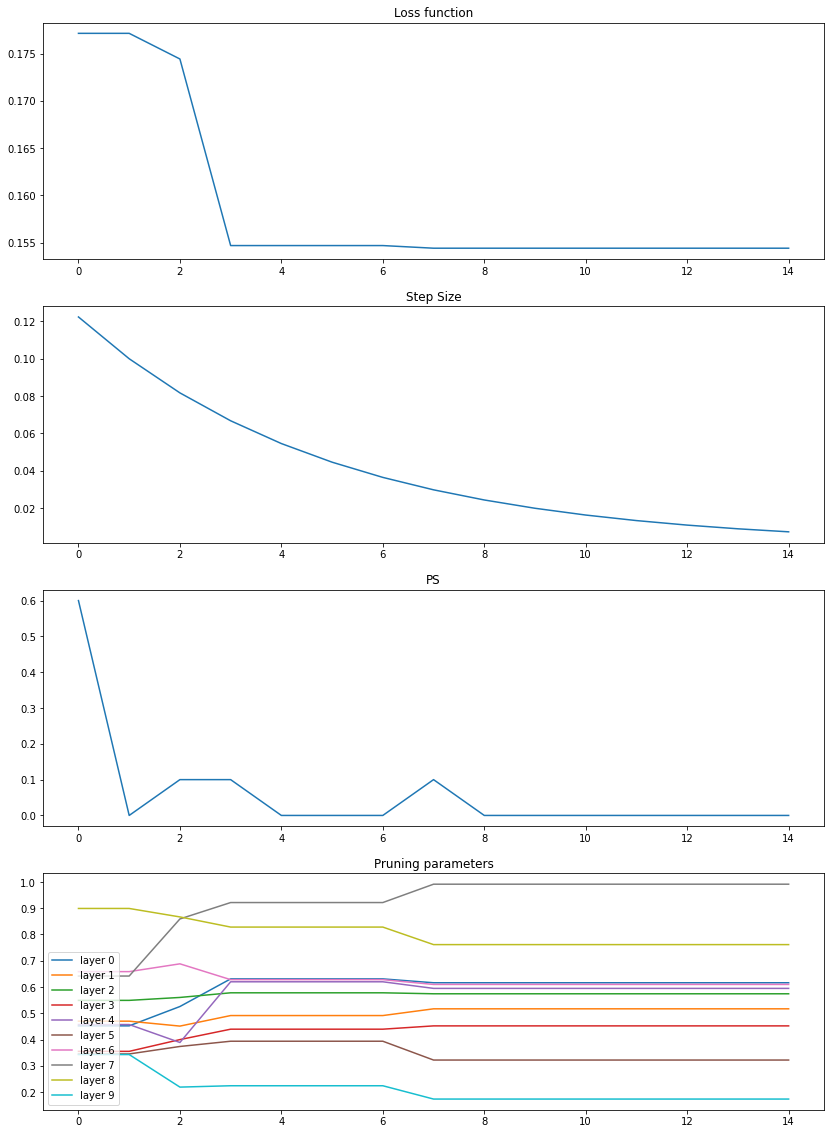

In [16]:
def plotOFResult(arr1, arr2,arr3, arr2d, model_name):
    run_num = len(arr1)
    parm_num = len(arr2d[0])
    plt.figure(figsize=(14,20))
    
    ax1 = plt.subplot(411)
    ax1.plot(arr1)
    ax1.set_title('Loss function')

    ax2 = plt.subplot(412)
    ax2.plot(arr2)
    ax2.set_title('Step Size')

    ax2 = plt.subplot(413)
    ax2.plot(arr3)
    ax2.set_title('PS')

    ax3 = plt.subplot(414)
    for line in range(parm_num):
        ax3.plot([arr2d[j][line] for j in range(run_num)], label = f'layer {line}')

    ax3.set_title('Pruning parameters')    
    ax3.legend(loc=3)   

    now=datetime.now()
    time_print=now.strftime("%Y-%m-%d %H:%M:%S")
    plt.savefig(f'./image_output/{model_name}OneFifthEC_{run_num}runs_{time_print}.png',dpi = 400)
    plt.show()
    

plotOFResult(BS_reocrd,SZ_record,PS_record,DV_record,"VGG11")

